**Imports**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import statistics

### **Hybrid Solver results**

In [144]:
chimeraData = np.array([(8769.231081008911,8945.536136627197,8931.495904922485),(9855.141401290894,9189.445734024048,8978.399276733398),(11952.266693115234,11642.198085784912,11762.96615600586),(16425.88448524475,17127.06756591797,16556.87713623047),(24312.684059143066,25011.505365371704,26475.871801376343),(45385.76316833496,44292.30570793152,41060.27841567993),(79275.4545211792,76890.6044960022,73106.68134689331),(125331.2509059906,132043.29466819763,123653.58638763428),(187454.13851737976,179132.38906860352,196690.04154205322),(384309.3180656433,401309.23199653625,366947.10993766785)])
for i in range(10):
  chimeraData[i] /= 1000

chimeraEnergies = ((-686.9892960699999,-686.9892960699999,-686.9892960699999),(-1384.9344597299998,-1384.9344597299998,-1384.9344597299998),(-2087.2417464654995,-2088.2823098609997,-2088.4212412955),(-2776.5958269684998,-2780.0959532986,-2770.6936963840994),(-3467.0697099416,-3470.866165402199,-3474.2905970664997),(-4168.072369486399,-4166.190514969399,-4161.723760551499),(-4864.280735826899,-4865.045051245899,-4864.181819322699),(-5558.669544316699,-5561.250561528,-5558.907933076899),(-6260.09192844,-6254.5052110028,-6246.7467772807995),(-6949.013940052499,-6943.536681619699,-6956.8833650735))
chimeraMeans = np.zeros(10)
chimeraCoefficientVariation = np.zeros(10)
chimeraErrors = np.zeros(10)
chimeraEnergiesCV = np.zeros(10)
for i in range(10):
  chimeraMeans[i] =  statistics.mean(chimeraData[i])
  chimeraErrors[i] = (np.nanmax(chimeraData[i]) - np.nanmin(chimeraData[i]))/2
  chimeraCoefficientVariation[i] = statistics.stdev(chimeraData[i])/chimeraMeans[i]
  chimeraEnergiesCV[i] = abs(statistics.stdev(chimeraEnergies[i])/statistics.mean(chimeraEnergies[i]))
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [145]:
chimeraEnergiesCV

array([0.00000000e+00, 0.00000000e+00, 3.08733239e-04, 1.71193835e-03,
       1.04071126e-03, 7.82850752e-04, 9.71175274e-05, 2.56550974e-04,
       1.07166555e-03, 9.65346522e-04])

In [146]:
pegasusData = np.array([(9032.057285308838,8763.33999633789,8900.65312385559),(9151.53694152832,9237.968444824219,9572.992086410522),(11773.011684417725,11676.13935470581,11738.752603530884),(17137.731552124023,16179.726839065552,16262.320041656494),(25186.309099197388,26744.03738975525,24844.621896743774),(45787.71257400513,47348.22607040405,45639.46461677551),(76868.8108921051,68643.52107048035,72487.25938796997),(124037.09530830383,135040.7738685608,129641.28875732422),(216924.03864860535,224836.23433113098,183607.4197292328),(389485.0287437439,305044.77739334106,314636.2016201019)])
for i in range(10):
  pegasusData[i] /= 1000

pegasusMeans = np.zeros(10)
pegasusEnergies = ((-686.9892960699999,-686.9892960699999,-686.9892960699999),(-1384.9344597299998,-1384.9344597299998,-1384.9344597299998),(-2086.6623298455997,-2085.4769582559998,-2086.5315619894996),(-2775.8834802546,-2771.3513374305,-2771.0875572969994),(-3465.0862602646,-3467.0697099416,-3471.4292149111),(-4165.211171695099,-4171.135664502501,-4167.977704950899),(-4864.918796386599,-4870.766241440999,-4861.4246990348),(-5560.7041855074995,-5562.457679409599,-5565.227065562899),(-6262.745835635,-6262.1863985275995,-6246.7467772807995),(-6956.0407396515,-6953.0695639656,-6950.771689294699))
pegasusCoefficientVariation = np.zeros(10)
pegasusErrors = np.zeros(10)
pegasusEnergiesCV = np.zeros(10)
for i in range(10):
  pegasusMeans[i] =  statistics.mean(pegasusData[i])
  pegasusErrors[i] = (np.nanmax(pegasusData[i]) - np.nanmin(pegasusData[i]))/2
  pegasusCoefficientVariation[i] = statistics.stdev(pegasusData[i])/pegasusMeans[i]
  pegasusEnergiesCV[i] = abs(statistics.stdev(pegasusEnergies[i])/statistics.mean(pegasusEnergies[i]))

In [148]:
pegasusMeans

array([  8.89868347,   9.32083249,  11.72930121,  16.52659281,
        25.59165613,  46.25846775,  72.66653045, 129.57305264,
       208.45589757, 336.38866925])

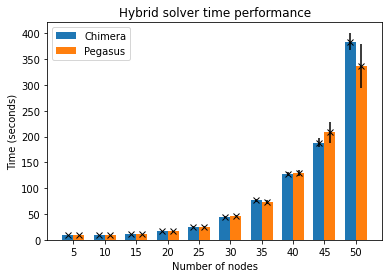

In [150]:
ind = np.arange(10)
width = 0.35

plt.bar(ind, chimeraMeans, width, label='Chimera', )
plt.errorbar(ind, chimeraMeans,yerr=chimeraErrors, fmt="x", color="black")
plt.bar(ind + width, pegasusMeans,width, label = 'Pegasus',)
plt.errorbar(ind + width, pegasusMeans,yerr=pegasusErrors, fmt="x", color='black')
plt.title('Hybrid solver time performance')
plt.xlabel('Number of nodes')
plt.ylabel('Time (seconds)')

plt.legend(loc='best')
plt.xticks(ind + width / 2, ('5', '10', '15', '20','25','30','35','40','45','50'))
plt.show()

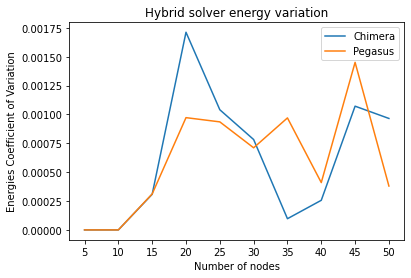

In [116]:
ind = np.arange(10)

plt.plot(ind, chimeraEnergiesCV, label = 'Chimera')
plt.plot(ind, pegasusEnergiesCV, label = 'Pegasus')

plt.title('Hybrid solver energy variation')
plt.xlabel('Number of nodes')
plt.ylabel('Energies Coefficient of Variation')

plt.legend(loc='best')
plt.xticks(ind, ('5', '10', '15', '20','25','30','35','40','45','50'))
plt.show()




---



---



---



### **Quantum solver results (QPUs)**

In [179]:
chimeraData = np.array([(432.2490692138672, 423.67100715637207, 312.4980926513672),(1515.6655311584473, 1599.677562713623, 2046.8759536743164),(3573.6334323883057, 2187.4918937683105, 1921.8871593475342),(4465.194940567017, 7681.472063064575, 6661.116600036621)])
chimeraDataAccess = np.array([(58.632, 58.631, 58.596),(58.683, 58.673, 58.680),(58.738, 58.725, 58.757),(58.848, 58.829, 58.824)])

chimeraMeans = np.zeros(4)
chimeraMeansAccess = np.zeros(4)

chimeraErrors = np.zeros(4)
chimeraErrorsAccess = np.zeros(4)

for i in range(4):
  chimeraMeans[i] =  statistics.mean(chimeraData[i])
  chimeraMeansAccess[i] =  statistics.mean(chimeraDataAccess[i])
  
  chimeraErrors[i] = (np.nanmax(chimeraData[i]) - np.nanmin(chimeraData[i]))/2
  chimeraErrorsAccess[i] = (np.nanmax(chimeraDataAccess[i]) - np.nanmin(chimeraDataAccess[i]))/2
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [180]:
pegasusData = np.array([(218.7516689300537, 265.5811309814453, 304.0003776550293),(985.3565692901611, 1404.0865898132324, 1255.204439163208),(2125.0340938568115, 3142.390489578247, 3304.569721221924),(9395.69067955017, 6236.98091506958, 13375.242233276367),(22544.19183731079, 21073.546648025513, 16920.119285583496)])
pegasusDataAccess = np.array([(38.164, 37.948, 38.307),(35.525, 36.728, 38.164),(38.569, 41.737, 42.3),(40.953, 39.86, 38.177),(45.338, 45.785, 39.861)])

pegasusMeans = np.zeros(5)
pegasusMeansAccess = np.zeros(5)

pegasusErrors = np.zeros(5)
pegasusErrorsAccess = np.zeros(5)

for i in range(5):
  pegasusMeans[i] =  statistics.mean(pegasusData[i])
  pegasusErrors[i] = (np.nanmax(pegasusData[i]) - np.nanmin(pegasusData[i]))/2

  pegasusMeansAccess[i] =  statistics.mean(pegasusDataAccess[i])
  pegasusErrorsAccess[i] = (np.nanmax(pegasusDataAccess[i]) - np.nanmin(pegasusDataAccess[i]))/2
  

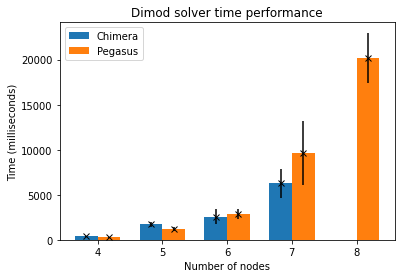

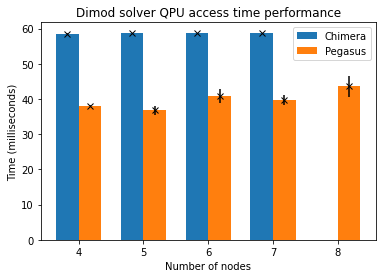

In [181]:
ind = np.arange(5)
ind2 = np.arange(4)
width = 0.35

plt.bar(ind2, chimeraMeans, width, label='Chimera' )
plt.errorbar(ind2, chimeraMeans,yerr=chimeraErrors, fmt="x", color="black")
plt.bar(ind + width, pegasusMeans,width, label = 'Pegasus')
plt.errorbar(ind + width, pegasusMeans,yerr=pegasusErrors, fmt="x", color='black')
plt.title('Dimod solver time performance')
plt.xlabel('Number of nodes')
plt.ylabel('Time (milliseconds)')

plt.legend(loc='best')
plt.xticks(ind + width / 2, ('4', '5', '6', '7','8'))
plt.show()

plt.bar(ind2, chimeraMeansAccess, width, label='Chimera' )
plt.errorbar(ind2, chimeraMeansAccess,yerr=chimeraErrorsAccess, fmt="x", color="black")
plt.bar(ind + width, pegasusMeansAccess,width, label = 'Pegasus')
plt.errorbar(ind + width, pegasusMeansAccess,yerr=pegasusErrorsAccess, fmt="x", color='black')
plt.title('Dimod solver QPU access time performance')
plt.xlabel('Number of nodes')
plt.ylabel('Time (milliseconds)')

plt.legend(loc='best')
plt.xticks(ind + width / 2, ('4', '5', '6', '7','8'))
plt.show()



---



---



---



---



### **Exact Solver results (CPU)**

In [189]:
cpuData = np.array([(101.00984573364258, 93.74046325683594, 93.7044620513916, 93.79434585571289, 78.10568809509277),(165171.03242874146, 177345.46875953674, 166083.33110809326, 169216.80688858032, 167050.40907859802)])
for i in range(2):
  cpuData[i] /= 1000

cpuMeans = np.zeros(2)
cpuErrors = np.zeros(2)
for i in range(2):
  cpuMeans[i] =  statistics.mean(cpuData[i])
  cpuErrors[i] = (np.nanmax(cpuData[i]) - np.nanmin(cpuData[i]))/2
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

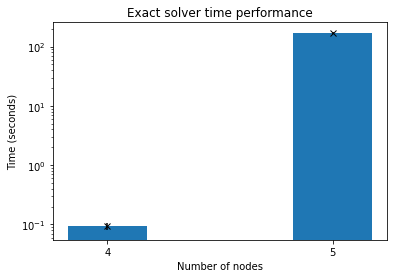

In [193]:
ind = np.arange(2)
width = 0.35

plt.bar(ind, cpuMeans, width=0.35)
plt.errorbar(ind, cpuMeans,yerr=cpuErrors, fmt="x", color="black")
plt.title('Exact solver time performance')
plt.xlabel('Number of nodes')
plt.ylabel('Time (seconds)')
plt.yscale('log')
plt.xticks(ind, ('4', '5'))
plt.show()

### **NVIDIA CUDA parallel version results**

GPU data was analysed with gnu-plot and therefore it is not in this notebook.
GPU results can be found in the repository.